In [3]:
# Week 4: Visualization & Insights
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Step 1: Load Week 3 schedule data
# Use full path (make sure it's saved as .csv)
schedule_df = pd.read_csv(r"C:\Users\91735\OneDrive\Desktop\AI-Green-Energy-Grid\week3_schedule.csv")

# Preview the data
schedule_df.head()


,date,waste_forecast,energy_forecast,energy_from_waste,energy_from_co2,total_supply,gap
0,2025-01-31,107.255172,181.381609,53627.586207,18.138161,53645.724368,53464.342759
1,2025-02-01,107.910345,180.352466,53955.172414,18.035247,53973.207660,53792.855195
2,2025-02-02,108.565517,179.323322,54282.758621,17.932332,54300.690953,54121.367631
3,2025-02-03,109.220690,178.294179,54610.344828,17.829418,54628.174245,54449.880067
4,2025-02-04,109.875862,177.265035,54937.931034,17.726504,54955.657538,54778.392503


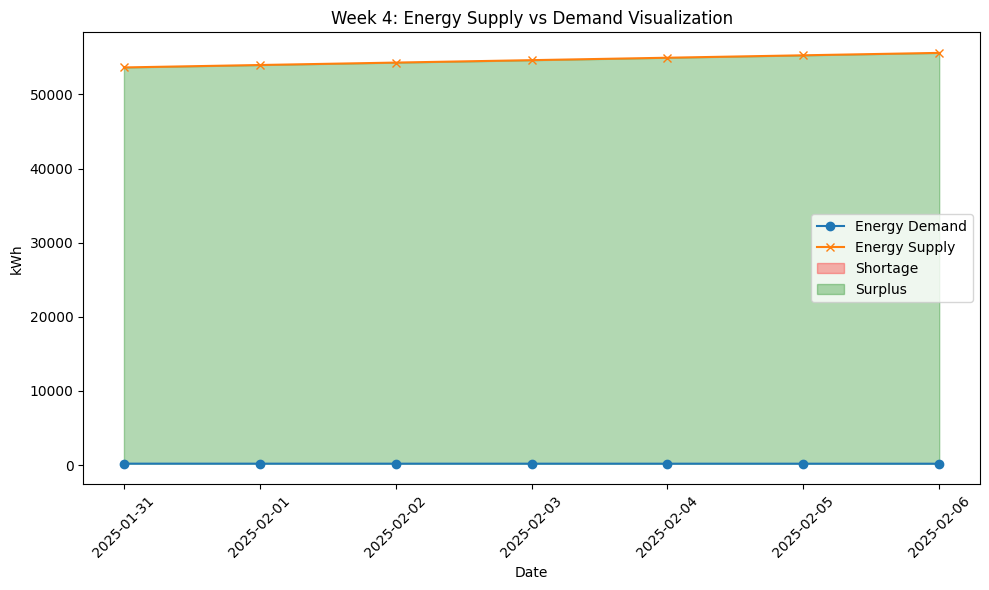

In [6]:
# Step 2: Plot Supply vs Demand
plt.figure(figsize=(10,6))

plt.plot(schedule_df["date"], schedule_df["energy_forecast"], label="Energy Demand", marker="o")
plt.plot(schedule_df["date"], schedule_df["total_supply"], label="Energy Supply", marker="x")

# Highlight shortages and surpluses
plt.fill_between(schedule_df["date"], schedule_df["total_supply"], schedule_df["energy_forecast"], 
                 where=(schedule_df["total_supply"]<schedule_df["energy_forecast"]), 
                 color="red", alpha=0.3, label="Shortage")
plt.fill_between(schedule_df["date"], schedule_df["total_supply"], schedule_df["energy_forecast"], 
                 where=(schedule_df["total_supply"]>=schedule_df["energy_forecast"]), 
                 color="green", alpha=0.3, label="Surplus")

plt.xticks(rotation=45)
plt.legend()
plt.title("Week 4: Energy Supply vs Demand Visualization")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.tight_layout()

# Save the plot as an image
plt.savefig("week4_supply_demand.png")
plt.show()


In [7]:
# Step 3: Generate quick summary
summary = {
    "Total Days": len(schedule_df),
    "Days with Shortage": (schedule_df["gap"]<0).sum(),
    "Days with Surplus": (schedule_df["gap"]>=0).sum(),
    "Max Shortage": schedule_df["gap"].min(),
    "Max Surplus": schedule_df["gap"].max()
}

print("📊 Week 4 Summary:")
for k, v in summary.items():
    print(f"{k}: {v}")


📊 Week 4 Summary:
Total Days: 7
Days with Shortage: 0
Days with Surplus: 7
Max Shortage: 53464.342758620674
Max Surplus: 55435.41737486096
